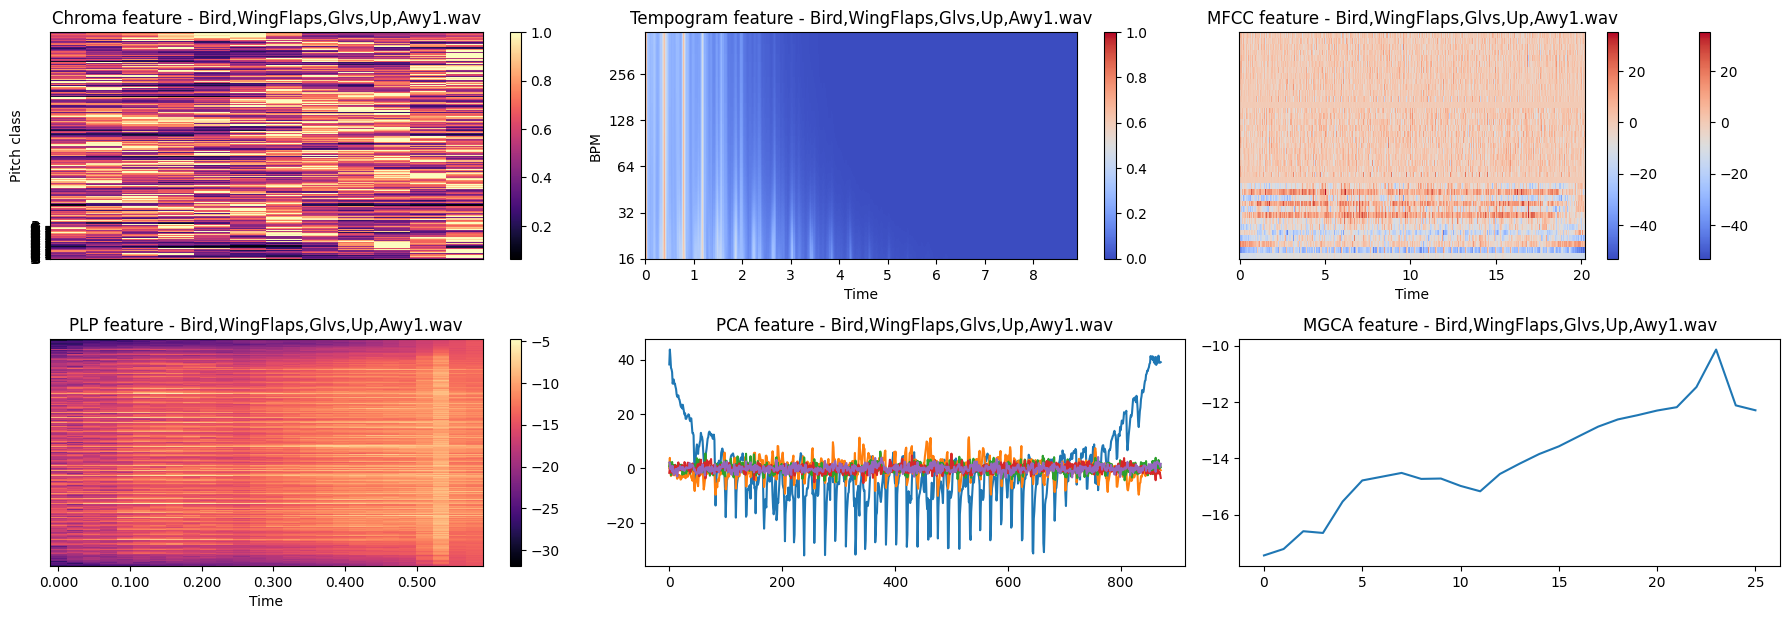

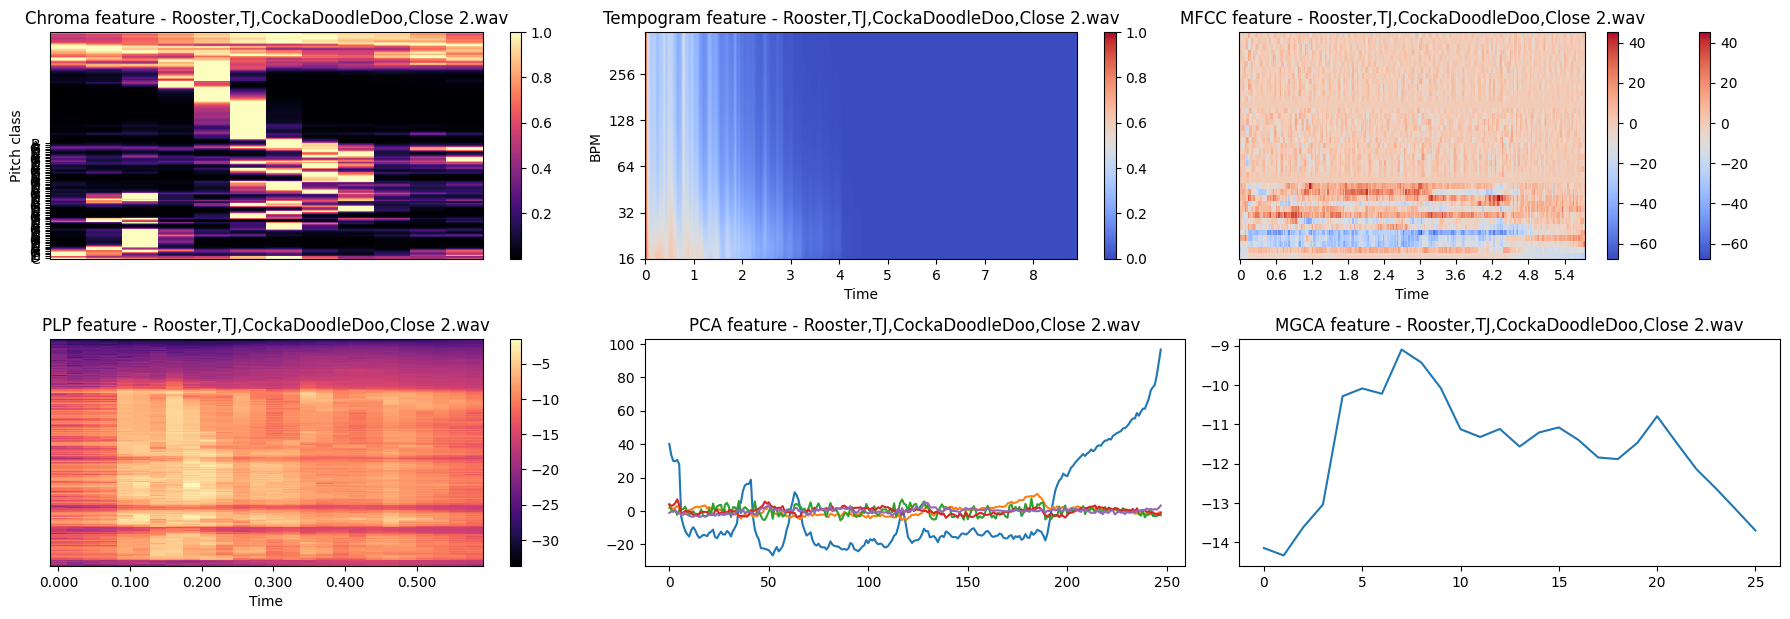

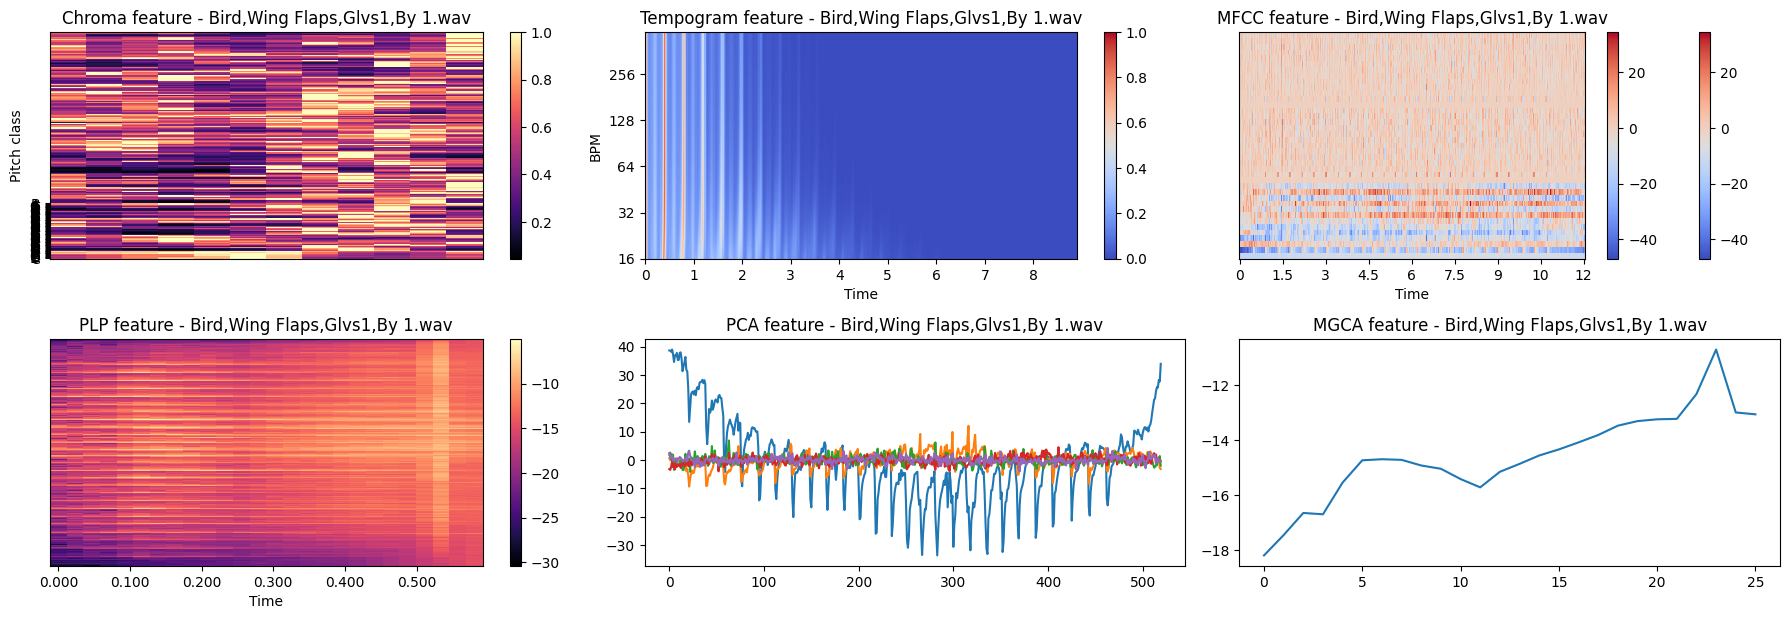

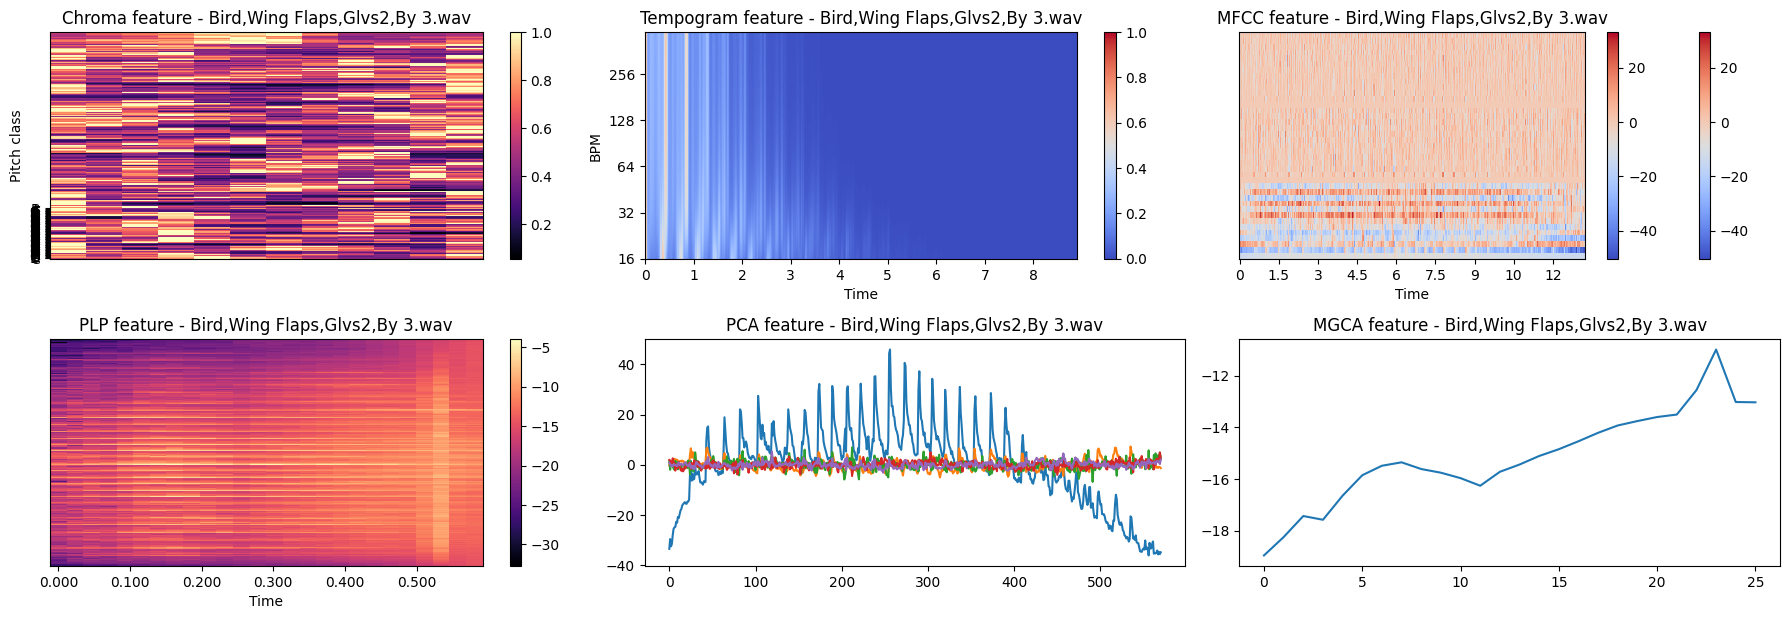

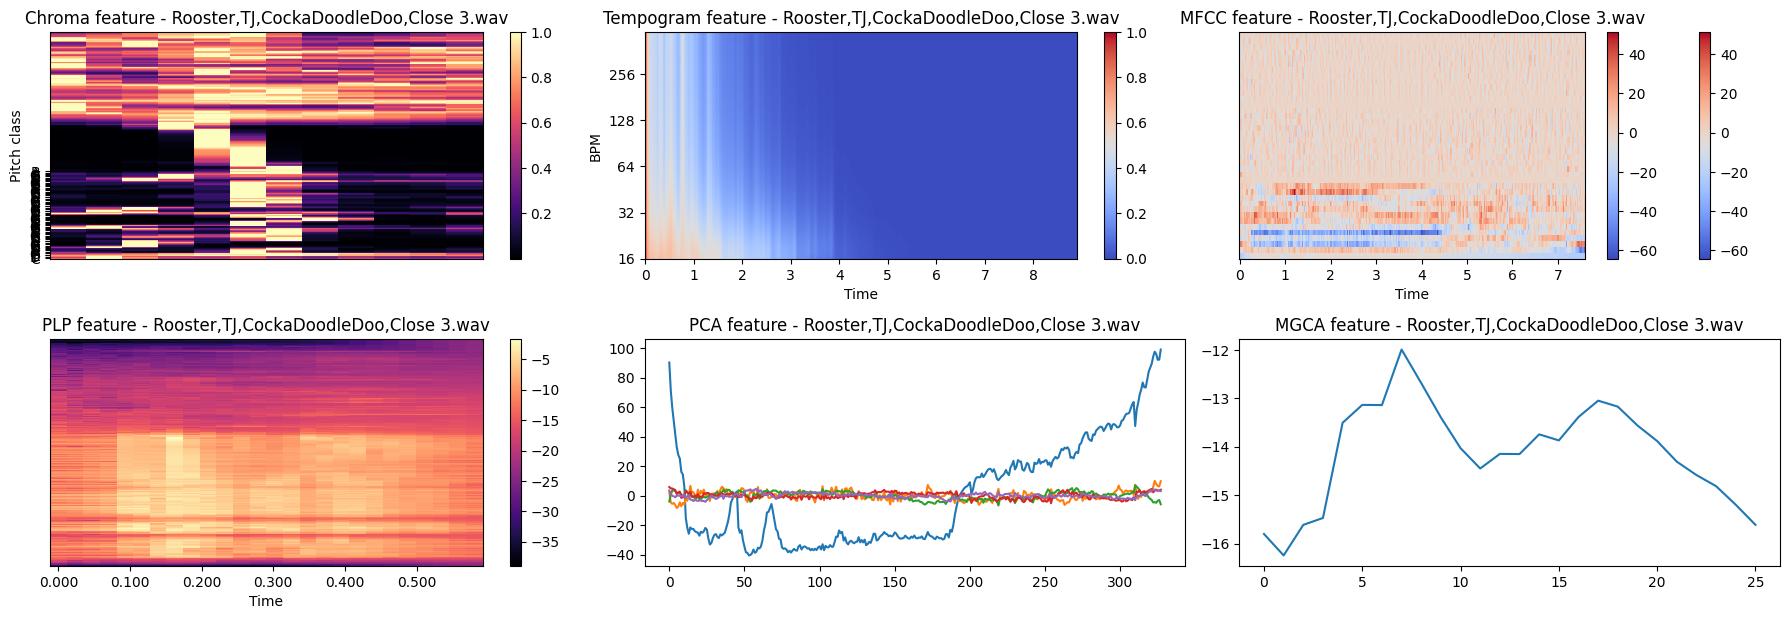

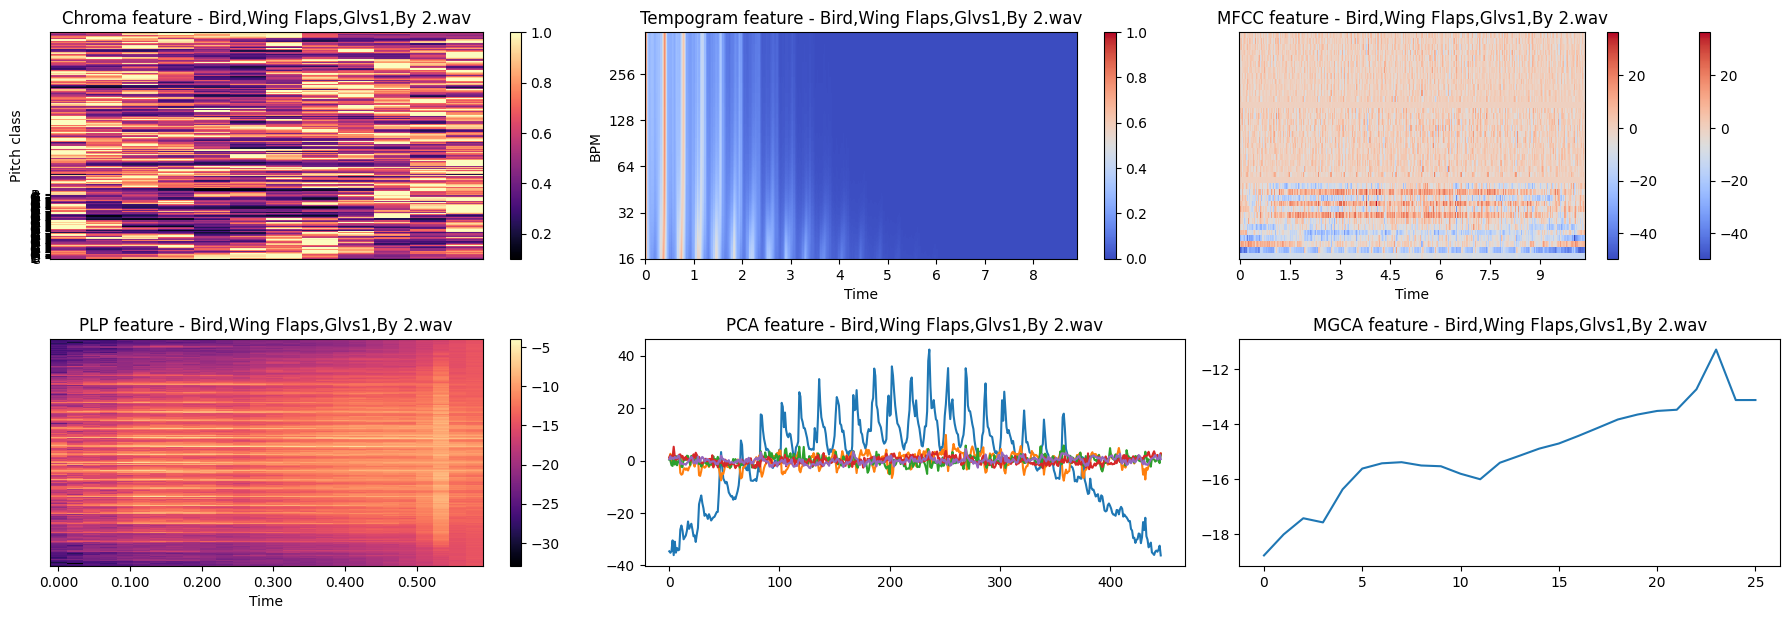

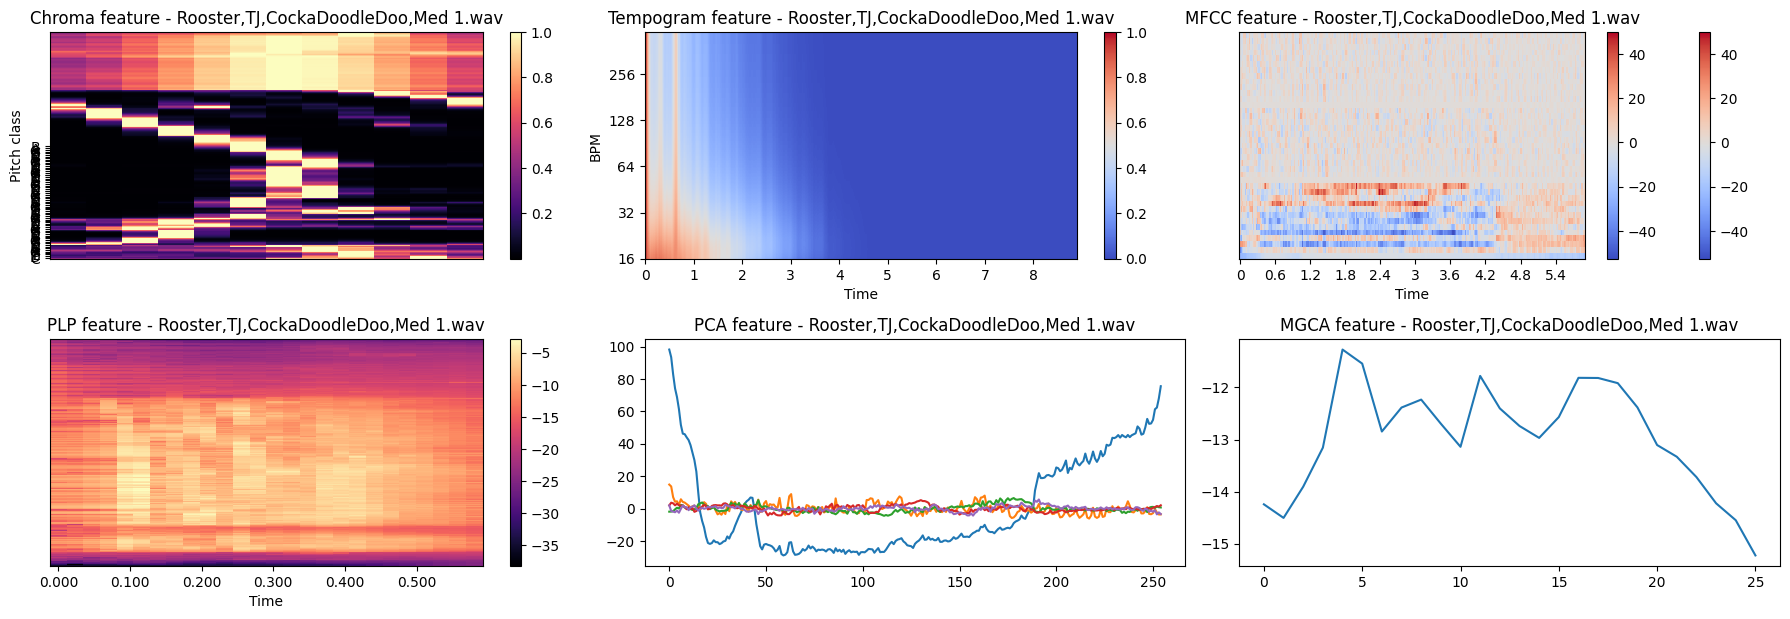

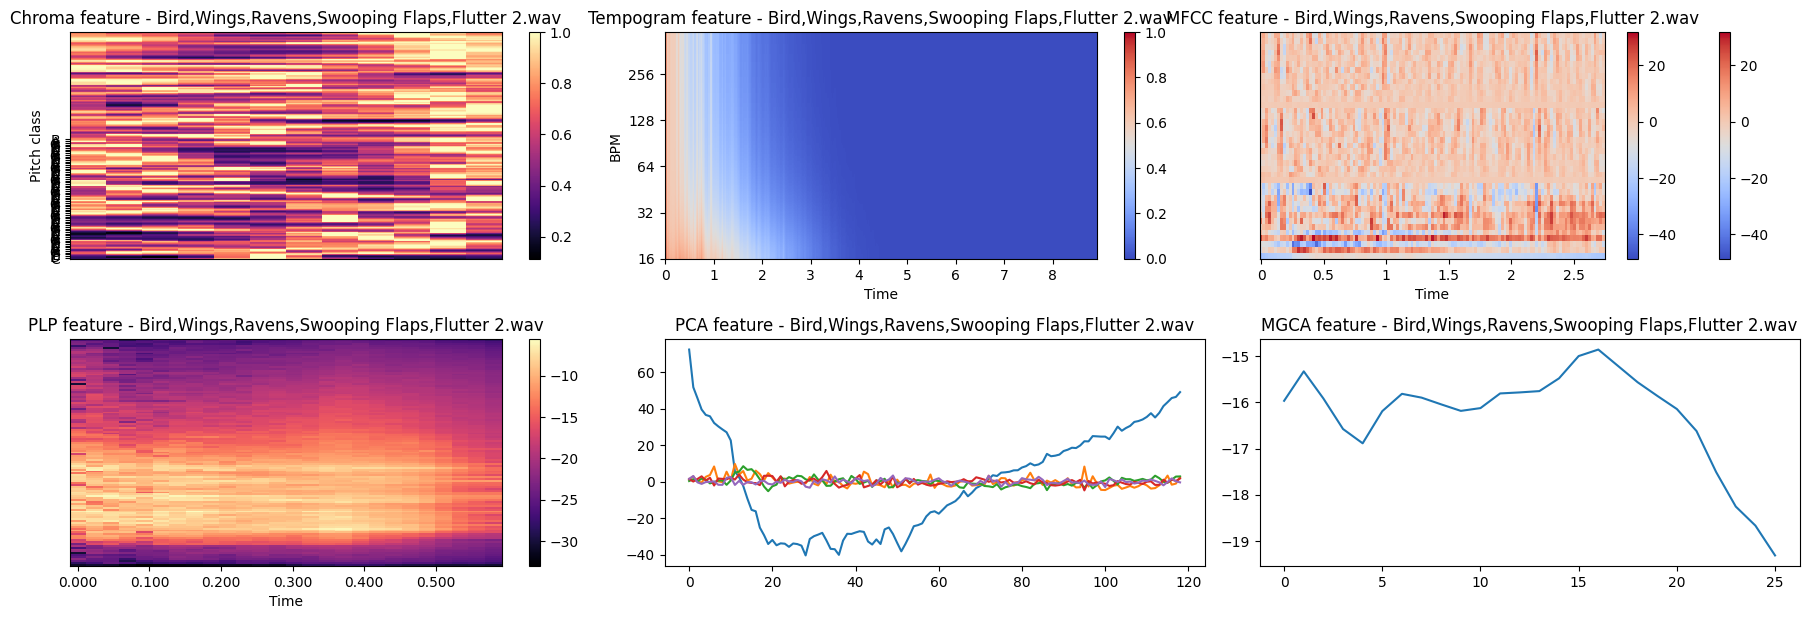

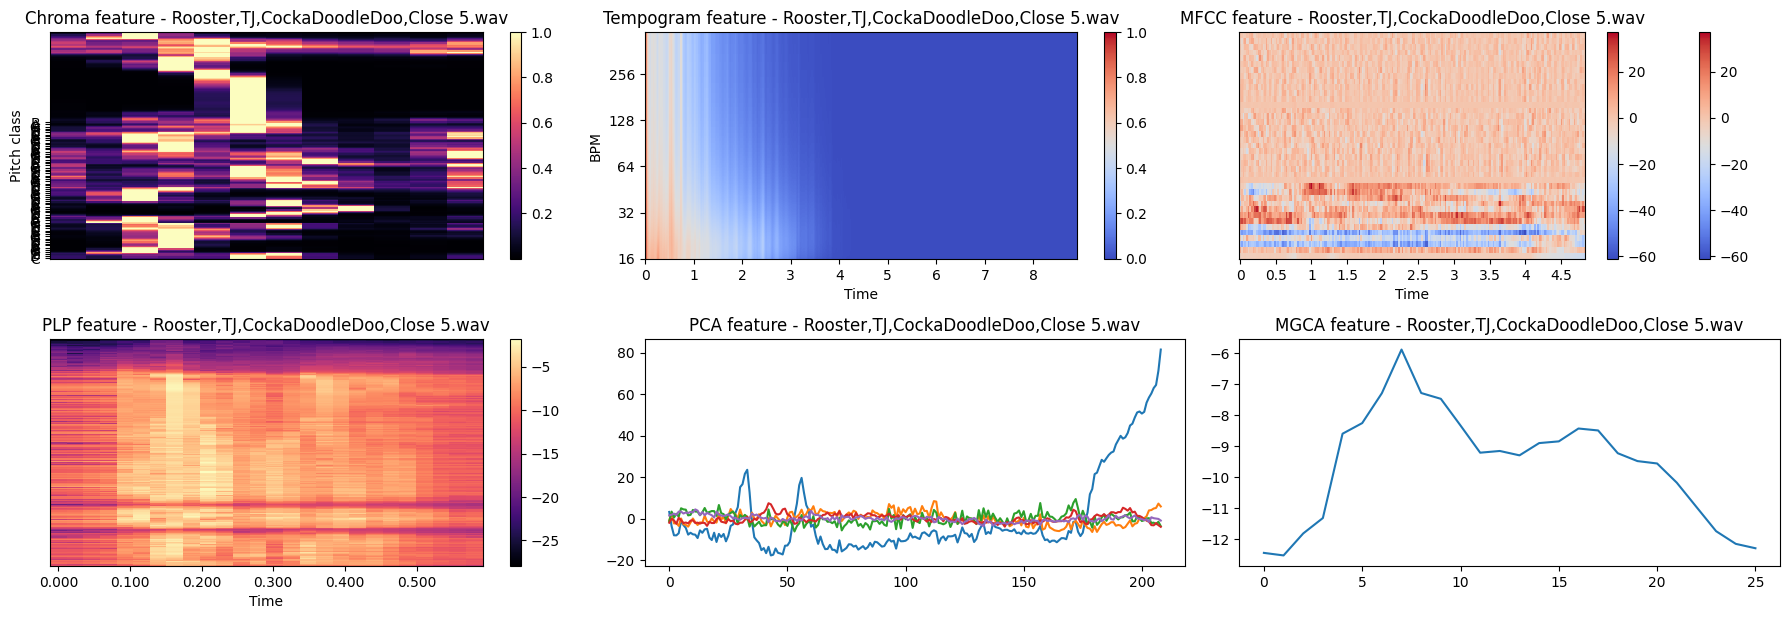

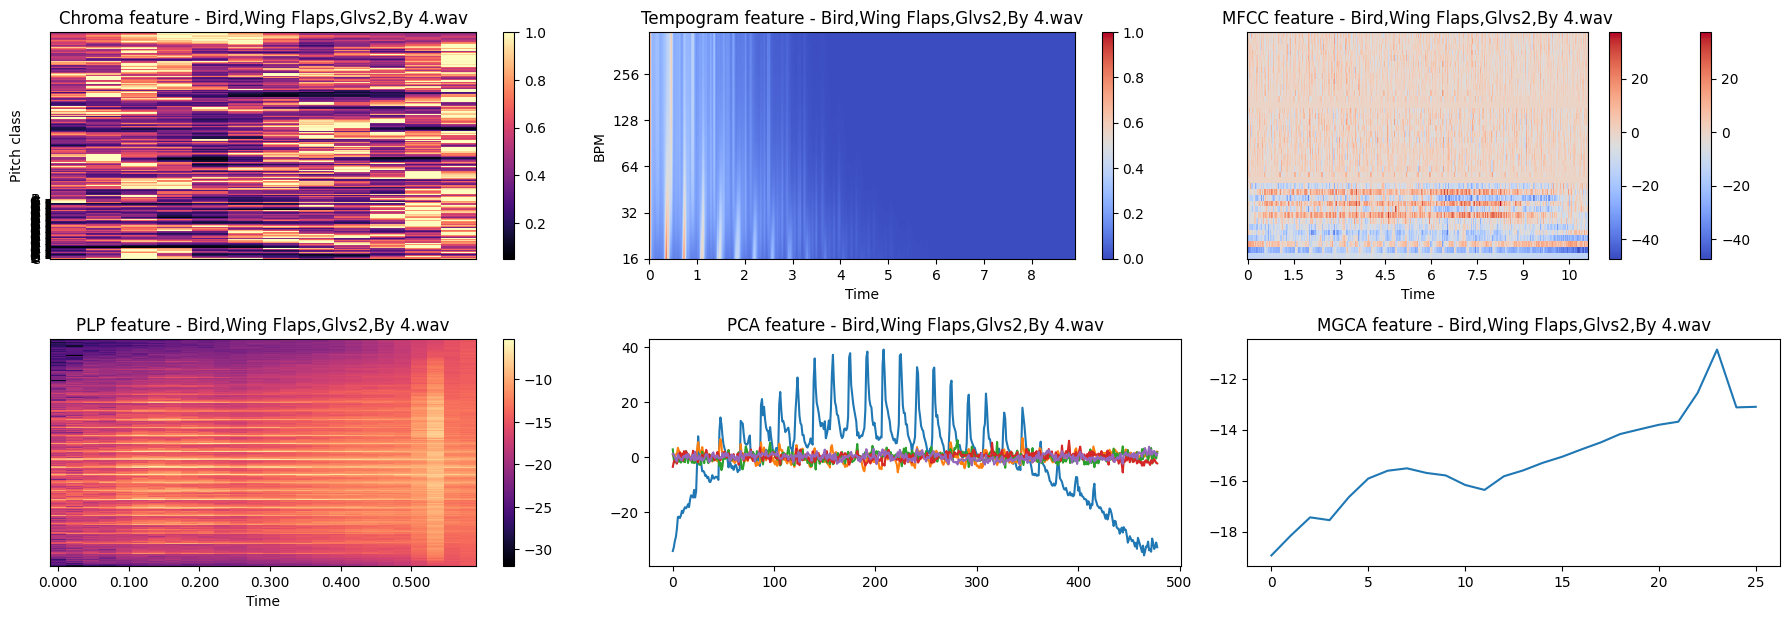

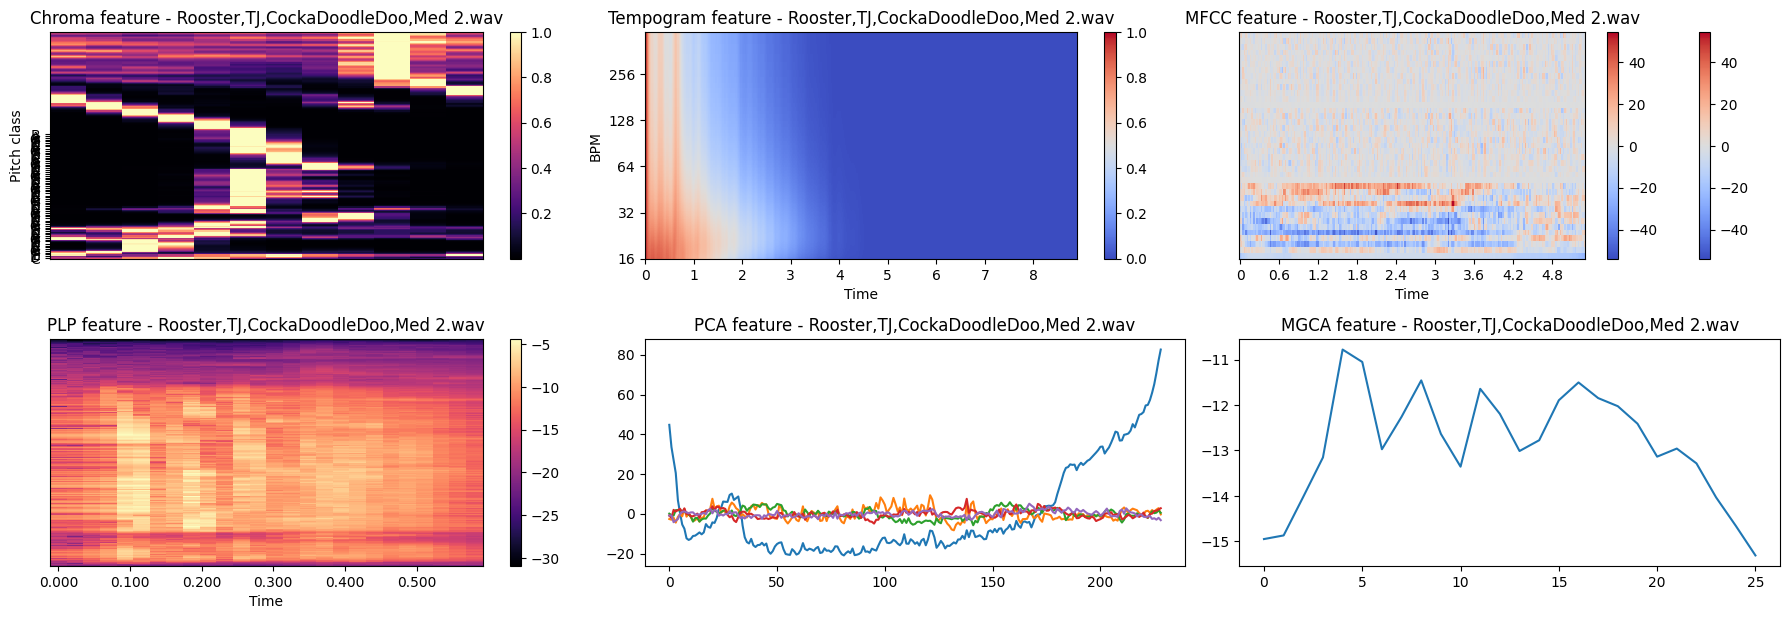

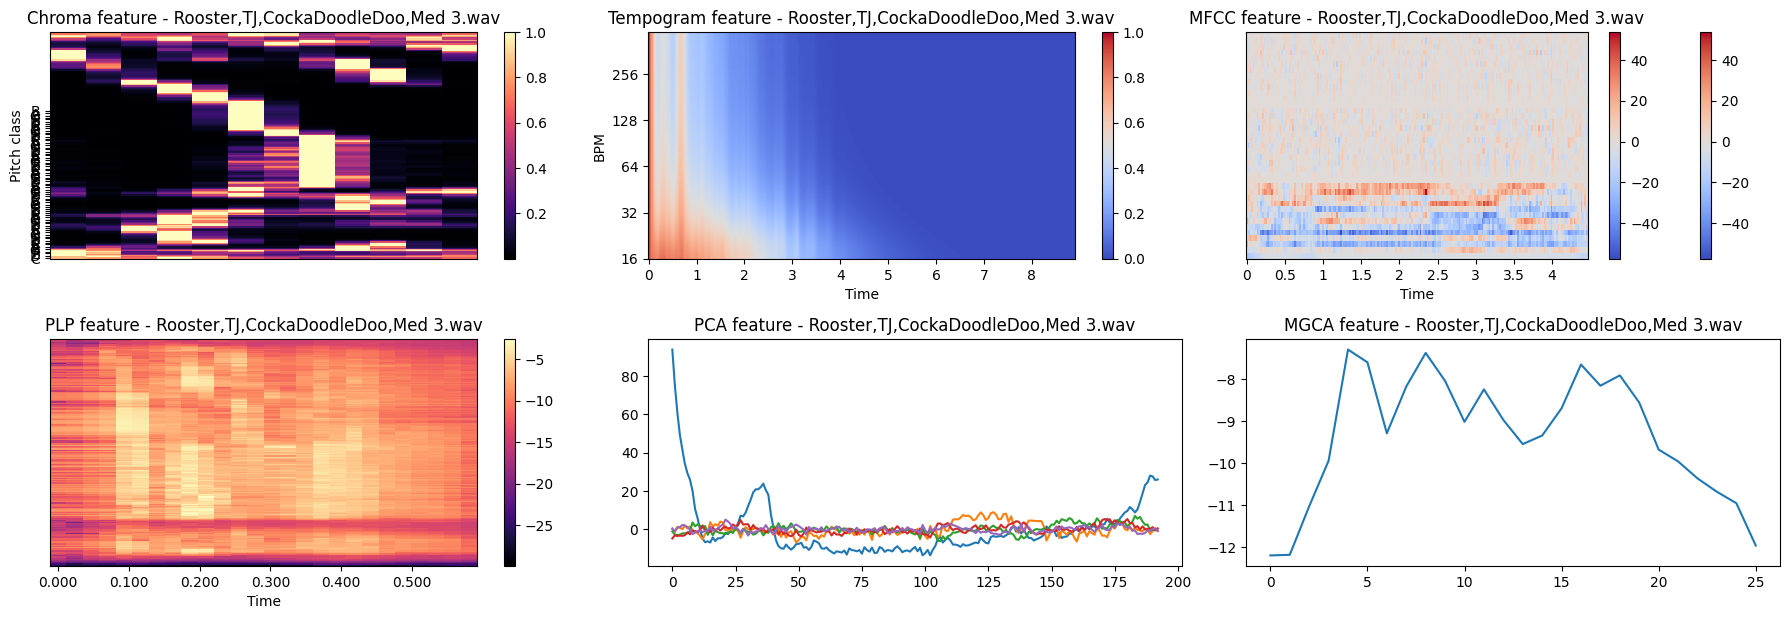

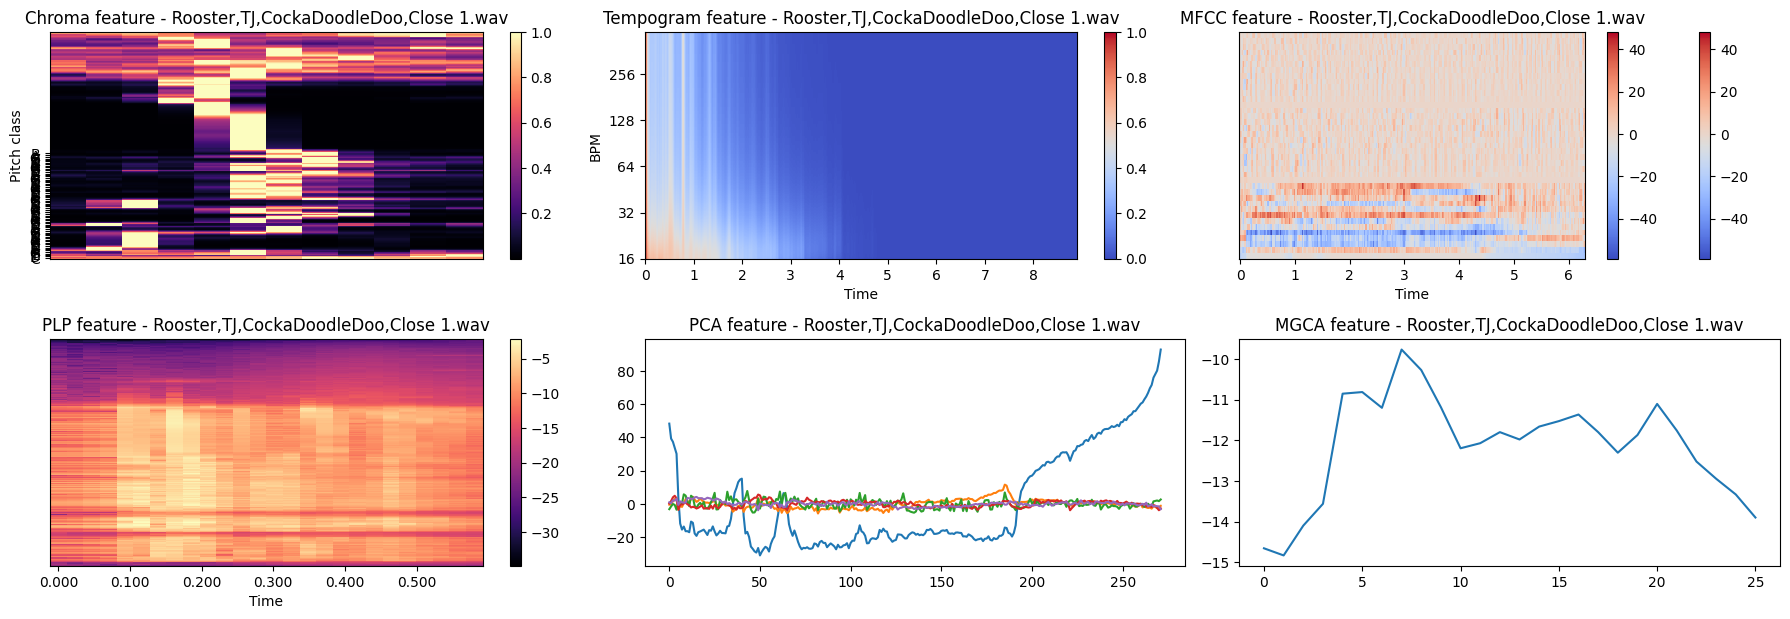

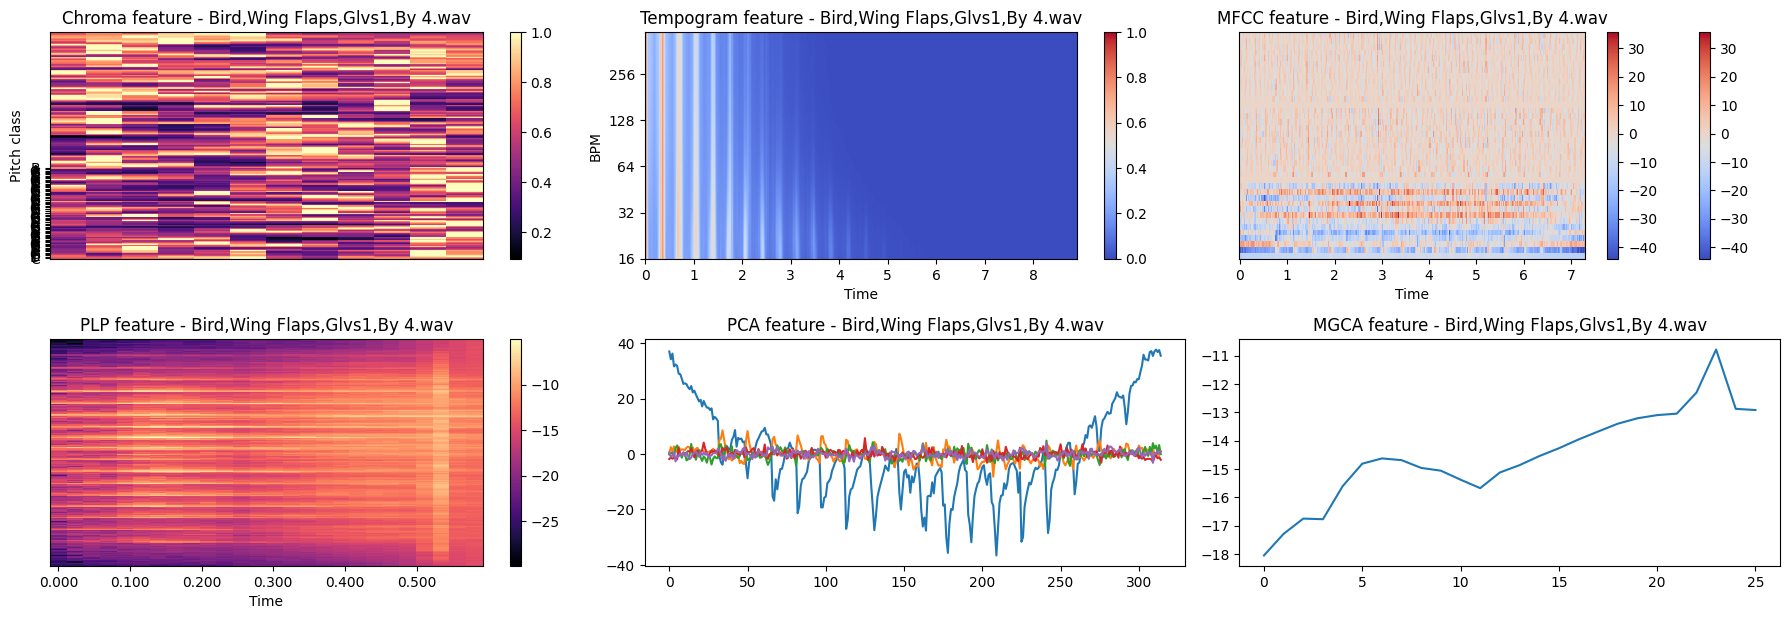

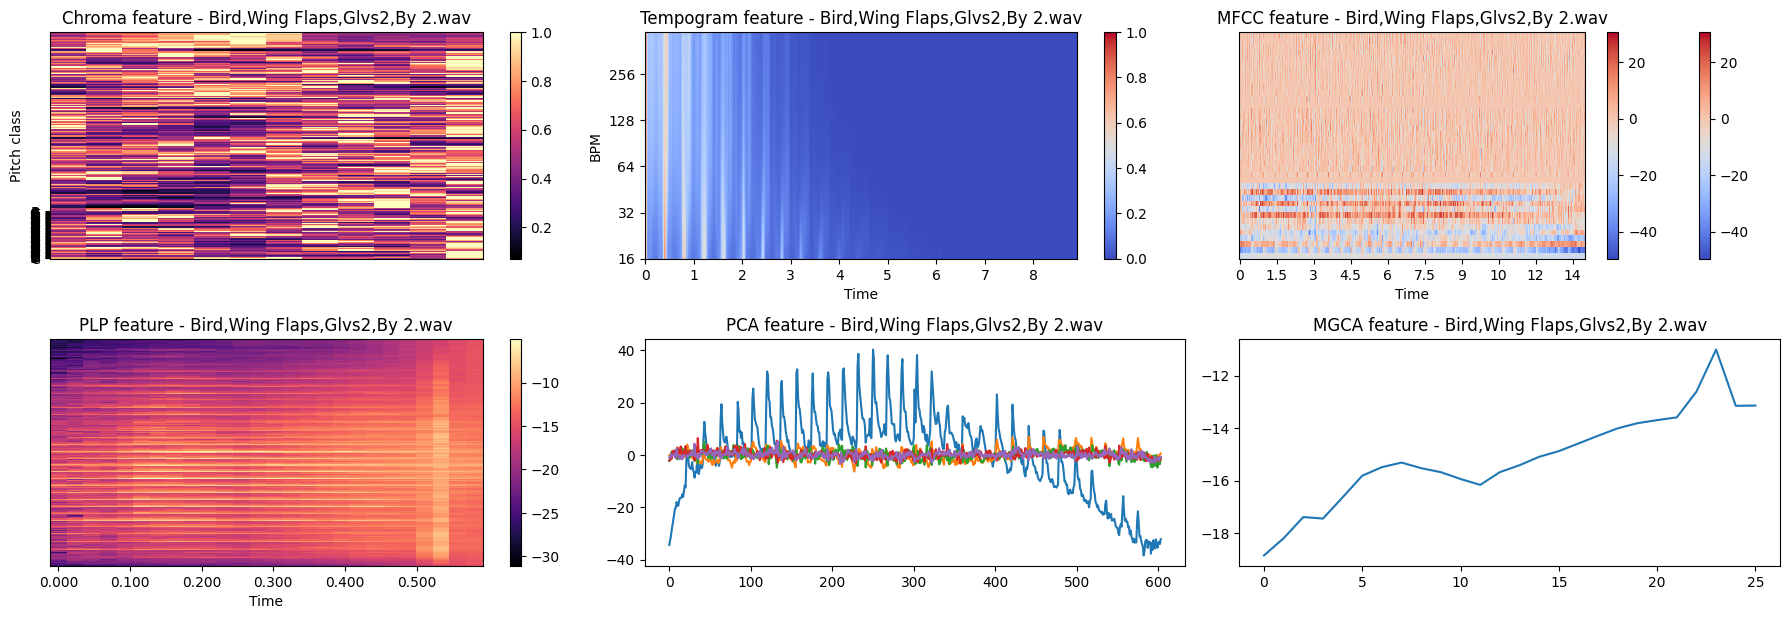

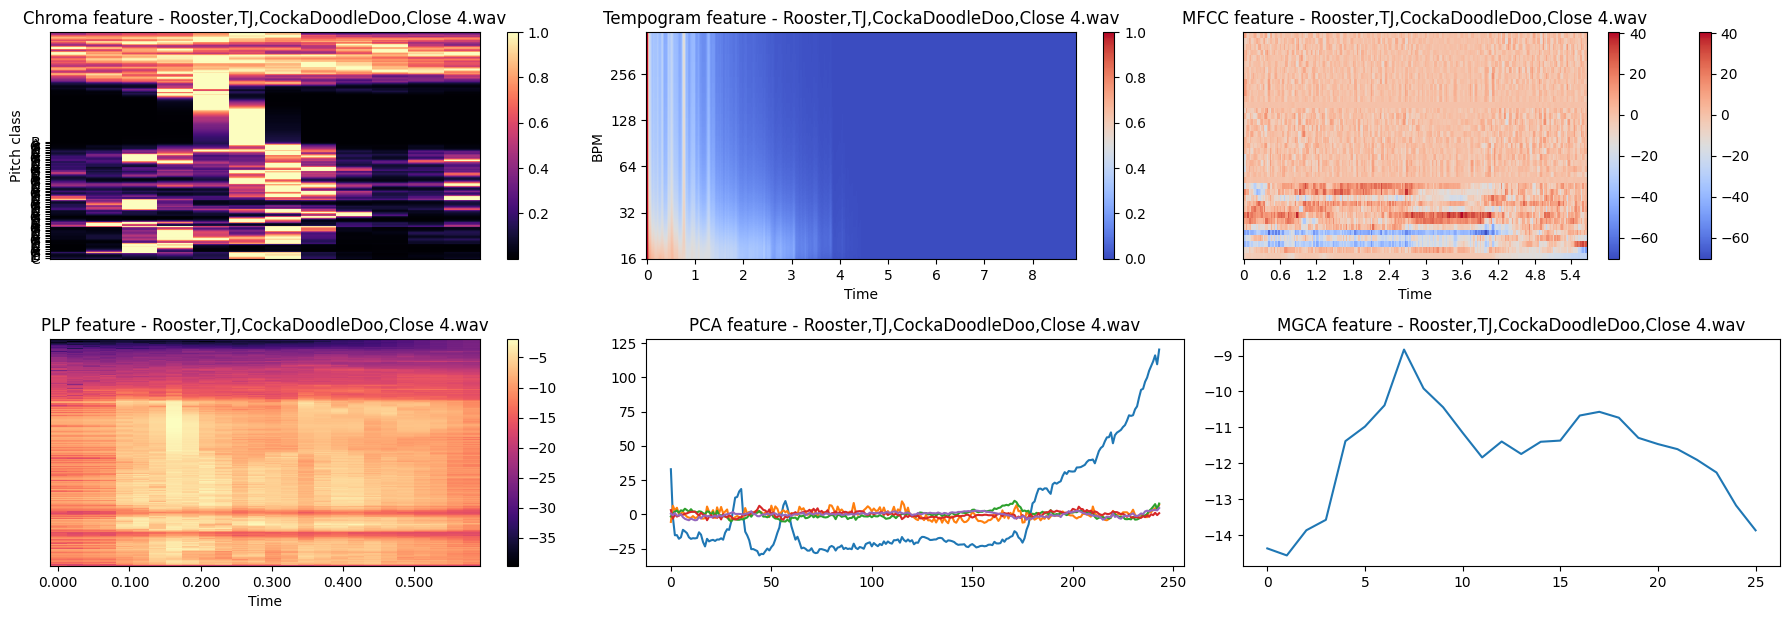

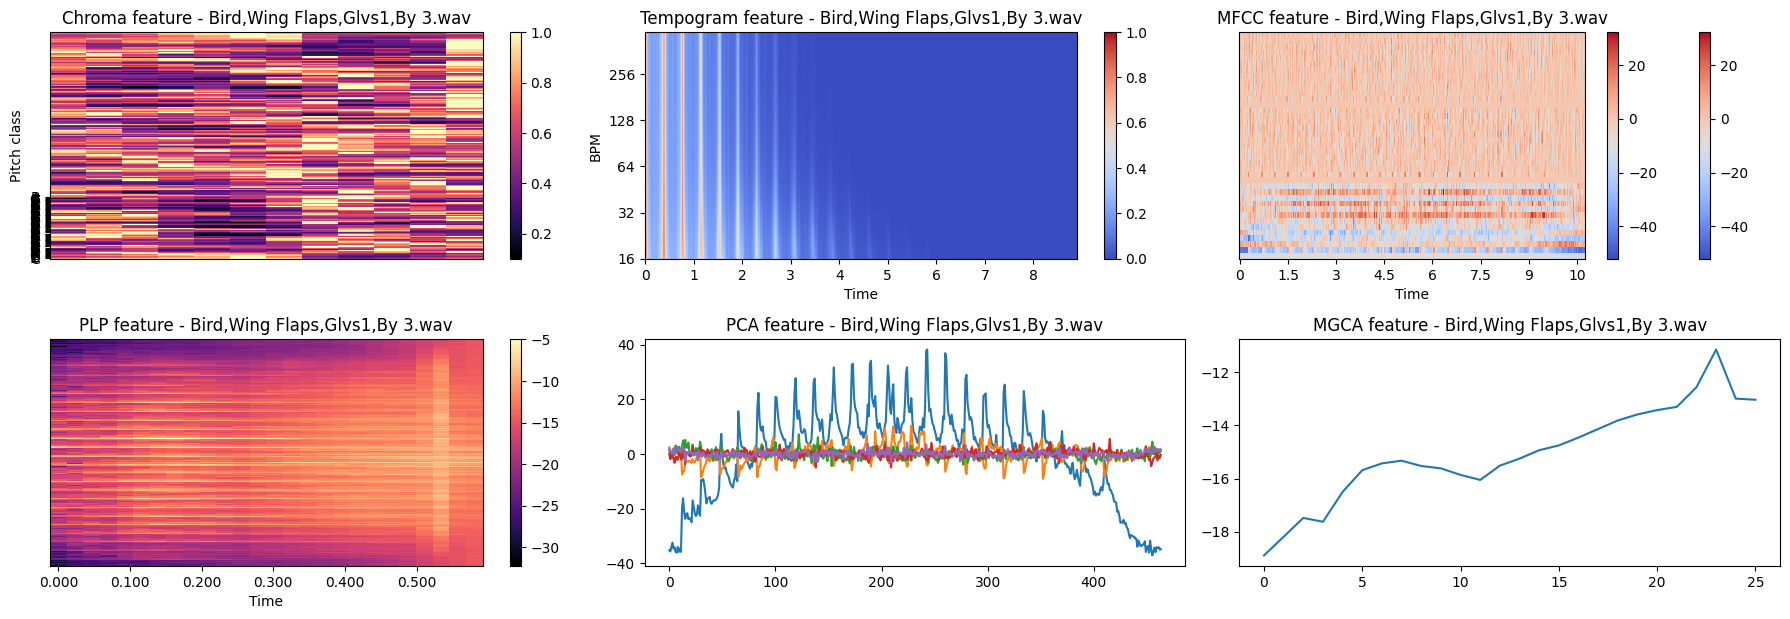

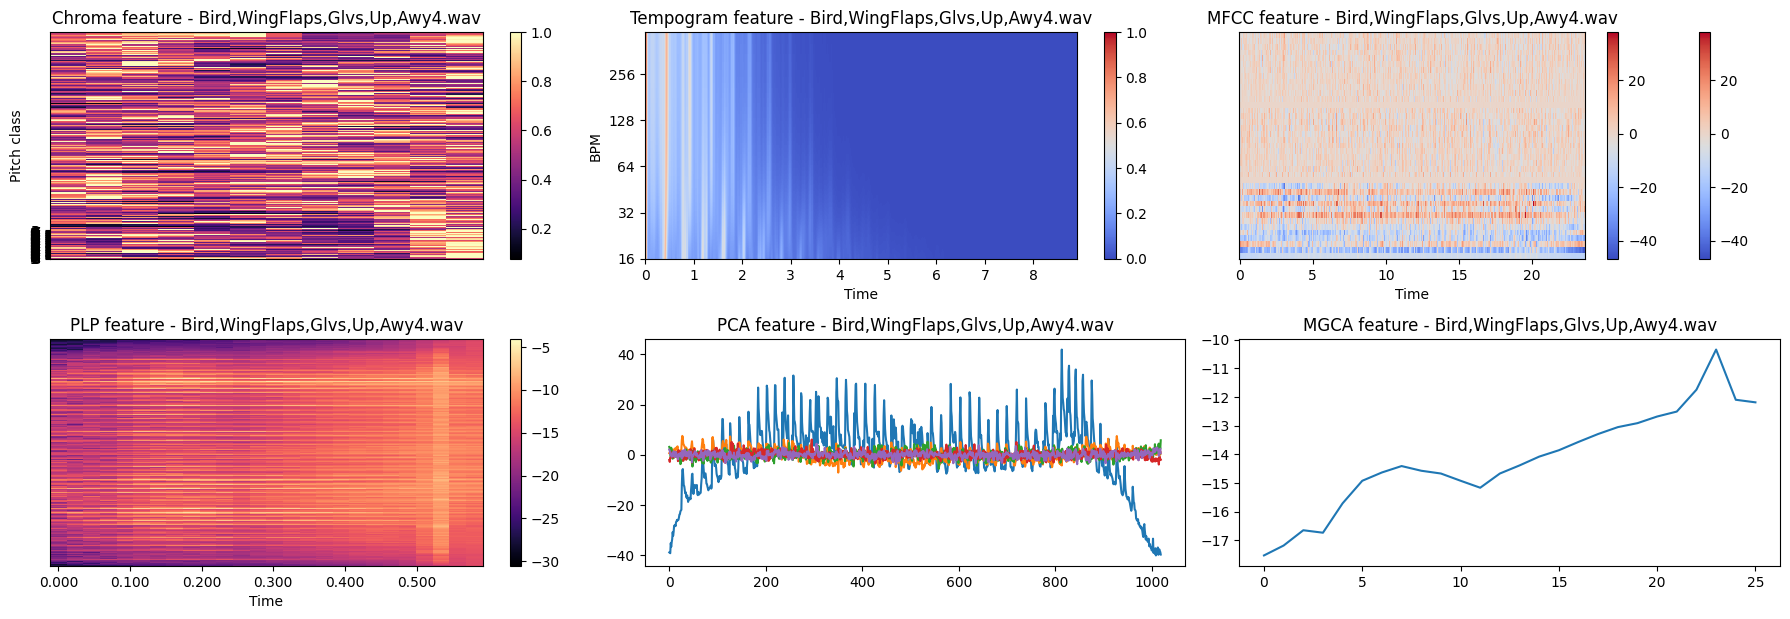

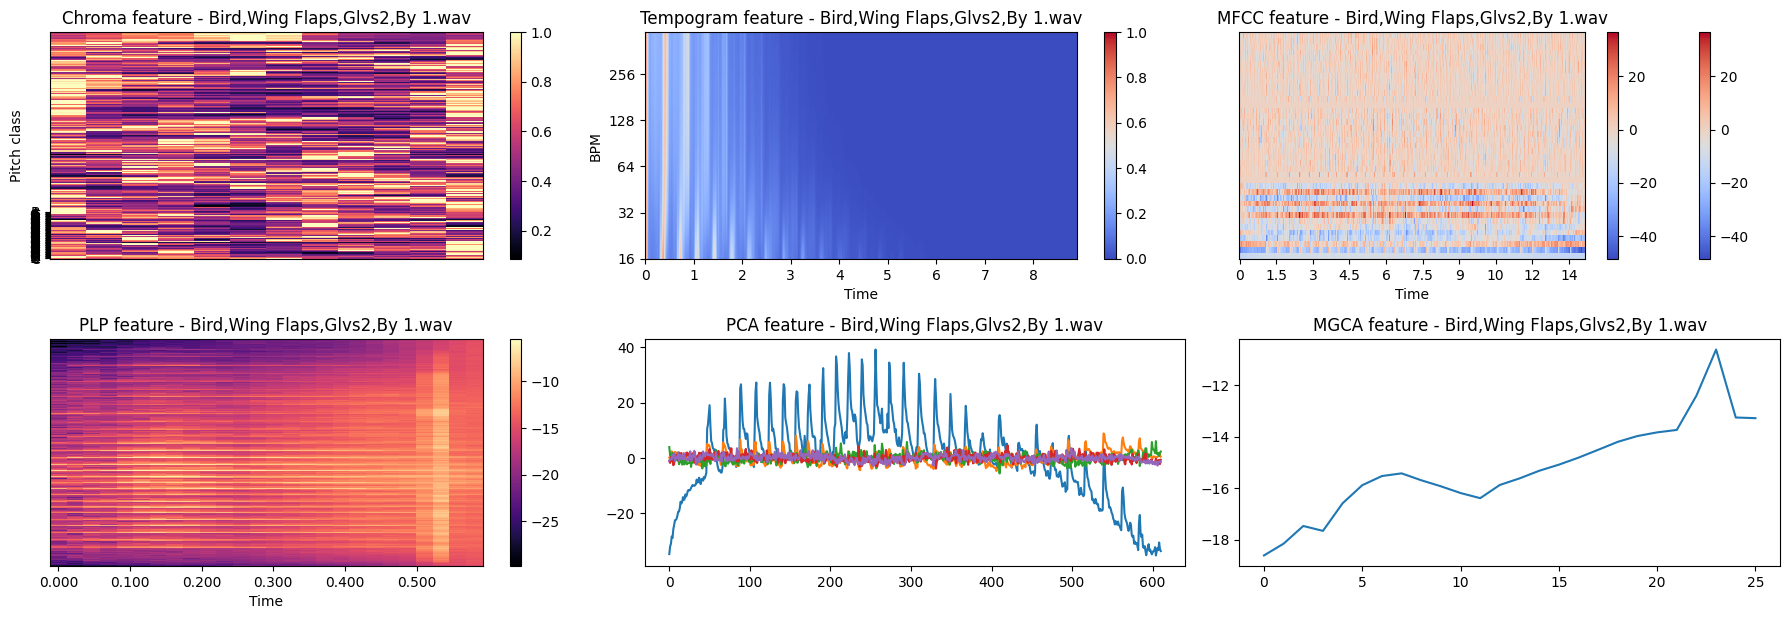

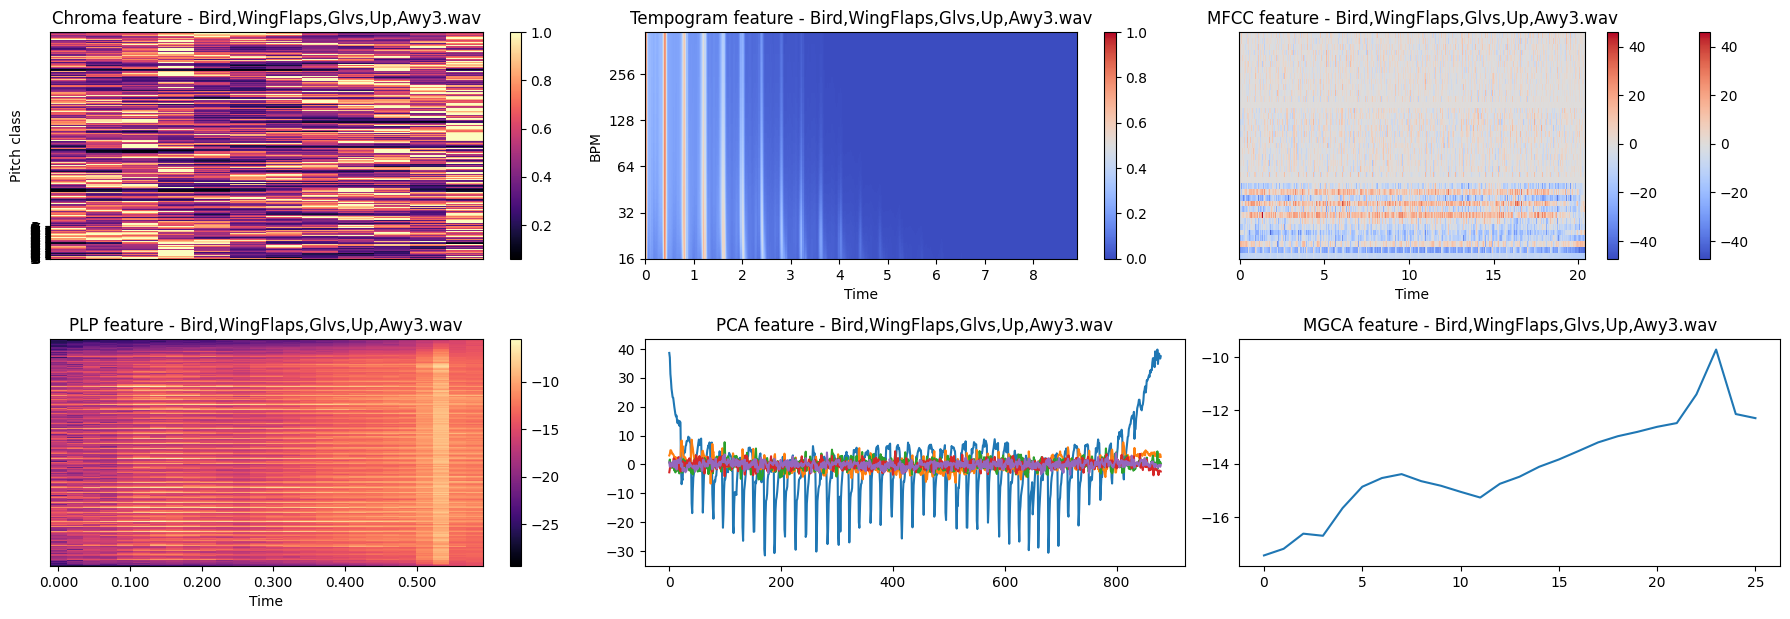

In [ ]:
!pip install python_speech_features
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.decomposition import PCA
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank

def extract_mfcc_delta_delta(waveform, sr):
    mfcc_feat = mfcc(waveform, sr)
    delta_feat = delta(mfcc_feat, 1)
    delta_delta_feat = delta(delta_feat, 1)
    return np.concatenate((mfcc_feat, delta_feat, delta_delta_feat), axis=1)

def extract_plp(waveform, sr):
    plp = logfbank(waveform, sr)
    return plp.T

def extract_pca(feature_matrix, n_components=5):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(feature_matrix)
    return pca_result

def extract_mgca(feature_matrix):
    mgca = np.mean(feature_matrix, axis=1)
    return mgca

def extract_and_plot_features(audio_directory, output_directory):
    # لیستی از فایل‌های صوتی در دایرکتوری
    audio_files = [f for f in os.listdir(audio_directory) if f.endswith('.wav')]

    for audio_file in audio_files:
        # ساخت دیتافریم‌ها برای هر ویژگی
        chroma_df = pd.DataFrame()
        tempogram_df = pd.DataFrame()

        mfcc_df = pd.DataFrame()
        plp_df = pd.DataFrame()
        pca_df = pd.DataFrame()
        mgca_df = pd.DataFrame()

        # تشکیل مسیر کامل به فایل صوتی
        audio_file_path = os.path.join(audio_directory, audio_file)

        # بارگیری موج صوتی با استفاده از librosa
        waveform, sr = librosa.load(audio_file_path, sr=None)

        # Update the n_fft parameter in chroma extraction
        chroma = librosa.feature.chroma_stft(y=waveform, sr=sr, n_fft=4096)  # You can adjust the value of n_fft

        # Update the hop_length parameter in tempogram extraction
        tempogram = librosa.feature.tempogram(y=waveform, sr=sr, hop_length=512)  # You can adjust the value of hop_length

        mfcc_delta_delta = extract_mfcc_delta_delta(waveform, sr)

        plp = extract_plp(waveform, sr)
        pca_result = extract_pca(plp.T)
        mgca = extract_mgca(plp)

        # اضافه کردن ویژگی‌ها به دیتافریم‌ها
        chroma_df = pd.concat([chroma_df, pd.DataFrame(chroma.T)], ignore_index=True)
        tempogram_df = pd.concat([tempogram_df, pd.DataFrame(tempogram.T)], ignore_index=True)

        mfcc_df = pd.concat([mfcc_df, pd.DataFrame(mfcc_delta_delta.T)], ignore_index=True)
        plp_df = pd.concat([plp_df, pd.DataFrame(plp.T)], ignore_index=True)
        pca_df = pd.concat([pca_df, pd.DataFrame(pca_result)], ignore_index=True)
        mgca_df = pd.concat([mgca_df, pd.DataFrame(mgca)], ignore_index=True)

        # ذخیره داده‌ها در فایل‌های CSV (خارج از حلقه)
        chroma_df.to_csv(os.path.join(output_directory, f'chroma_data_{audio_file}.csv'), index=False)
        tempogram_df.to_csv(os.path.join(output_directory, f'tempogram_data_{audio_file}.csv'), index=False)
        mfcc_df.to_csv(os.path.join(output_directory, f'mfcc_data_{audio_file}.csv'), index=False)
        plp_df.to_csv(os.path.join(output_directory, f'plp_data_{audio_file}.csv'), index=False)
        pca_df.to_csv(os.path.join(output_directory, f'pca_data_{audio_file}.csv'), index=False)
        mgca_df.to_csv(os.path.join(output_directory, f'mgca_data_{audio_file}.csv'), index=False)

        # نمایش ماتریس ویژگی‌ها
        plt.figure(figsize=(18, 12))

        # نمایش chroma
        plt.subplot(4, 3, 1)
        librosa.display.specshow(chroma_df.values, y_axis='chroma')
        plt.colorbar()
        plt.title(f'Chroma feature - {audio_file}')

        # نمایش tempogram
        plt.subplot(4, 3, 2)
        librosa.display.specshow(tempogram_df.values, x_axis='time', y_axis='tempo')
        plt.colorbar()
        plt.title(f'Tempogram feature - {audio_file}')

        # نمایش mfcc
        plt.subplot(4, 3, 3)
        librosa.display.specshow(mfcc_df.values, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC feature - {audio_file}')
        plt.colorbar()
        plt.title(f'MFCC feature - {audio_file}')

        # نمایش plp
        plt.subplot(4, 3, 4)
        librosa.display.specshow(plp_df.values, x_axis='time')
        plt.colorbar()
        plt.title(f'PLP feature - {audio_file}')

        # نمایش pca
        plt.subplot(4, 3, 5)
        plt.plot(pca_df.values)
        plt.title(f'PCA feature - {audio_file}')

        # نمایش mgca
        plt.subplot(4, 3, 6)
        plt.plot(mgca_df.values)
        plt.title(f'MGCA feature - {audio_file}')

        plt.tight_layout()
        plt.show()

# تعیین مسیر دایرکتوری حاوی فایل‌های صوتی
audio_directory = '/content/drive/MyDrive/unzipped/Big Room Sound Birds and Nature'

# تعیین مسیر خروجی برای فایل‌های CSV
output_directory = '/content/drive/MyDrive/unzipped/'

# اجرای تابع برای استخراج ویژگی‌ها و رسم نمودارها
extract_and_plot_features(audio_directory, output_directory)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored